In [1]:
from ml_config import *

In [2]:
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X,y = mnist['data'], mnist['target']

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

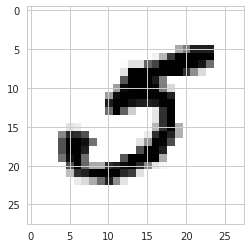

In [8]:
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation='nearest')
plt.show()

In [9]:
y[36000]

5.0

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42, n_jobs=-1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

# 1. array형태로 줄 것
# 2. True, False도 Label에 사용가능
# 3. cross_val_score는 sampling할 때 StratifiedKFold를 수행

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.94875,  0.9568 ,  0.9543 ])

In [16]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring='precision')

array([ 0.6665247 ,  0.74117647,  0.94339623])

In [17]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring='recall')

array([ 0.86607637,  0.80188157,  0.52573326])

In [18]:
from sklearn.base import BaseEstimator


class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.91145,  0.91025,  0.90725])

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import *

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print(y_train_pred.shape)

confusion_matrix(y_train_5, y_train_pred)

(60000,)


array([[53233,  1346],
       [ 1457,  3964]])

In [21]:
print(classification_report(y_train_5, y_train_pred))

             precision    recall  f1-score   support

      False       0.97      0.98      0.97     54579
       True       0.75      0.73      0.74      5421

avg / total       0.95      0.95      0.95     60000



In [22]:
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.746516007533
0.731230400295
0.738794147796


# 첫번째 행 = 5가 아님 ( False)
# 두번째 행 = 5임 ( True)

# 만약 y_train이 원래부터 클래스가 안섞여있고
# 차례대로 000011112222 이렇게 되있으면
# cross_val하기전에 섞는거 부터
# np.permutation()

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

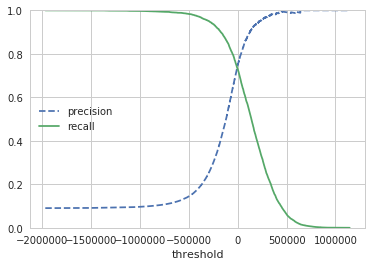

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.xlabel('threshold')
    plt.legend(loc='center left')
    plt.ylim([0, 1])
    plt.show()


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

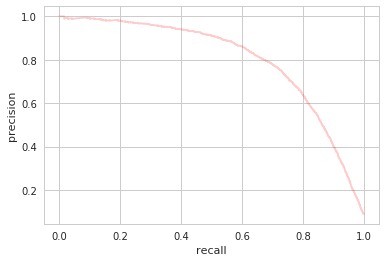

In [26]:
def plot_precision_recall_curve(precisions, recalls):
    from sklearn.metrics import average_precision_score

    plt.step(recalls, precisions, color='red', alpha=0.2, where='post')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.show()

plot_precision_recall_curve(precisions, recalls)

In [27]:
average_precision_score(y_train_5, y_scores,average='weighted')

0.8028287772045144

In [28]:
y_train_pred_90 = y_scores > 120000

In [29]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.894655545258
0.534218778823


In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

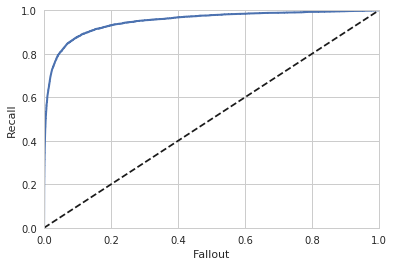

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Fallout')
    plt.ylabel('Recall')
    plt.show()


plot_roc_curve(fpr, tpr)

In [32]:
roc_auc_score(y_train_5, y_scores)

0.95053070769519543

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba', n_jobs=-1)

In [34]:
cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring='precision')

array([ 0.97655727,  0.98526457,  0.99127517])

In [35]:
cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring='recall')

array([ 0.8068622 ,  0.81405645,  0.81737687])

In [36]:
cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring='roc_auc')

array([ 0.99051404,  0.99273356,  0.99311808])

In [37]:
y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [38]:
thresholds_forest

array([ 1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,  0. ])

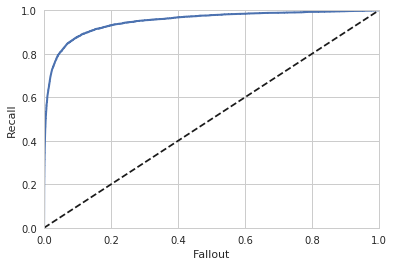

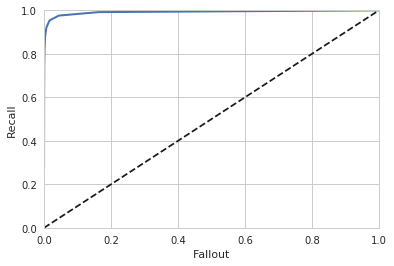

In [39]:
plot_roc_curve(fpr,tpr)
plot_roc_curve(fpr_forest, tpr_forest)

In [40]:
roc_auc_score(y_train_5, y_scores_forest)

0.99210175682310775

In [41]:
y_train_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [42]:
y_scores_forest

array([ 0. ,  0. ,  0. , ...,  0. ,  0.1,  0. ])

In [43]:
print(precision_score(y_train_5, y_scores_forest > 0.5))
print(recall_score(y_train_5, y_scores_forest > 0.5))

0.98436103664
0.812765172477


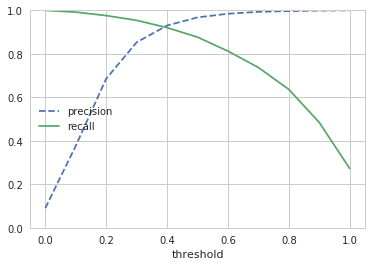

In [44]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)

In [45]:
y_scores_forest = y_probas_forest[:,0]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

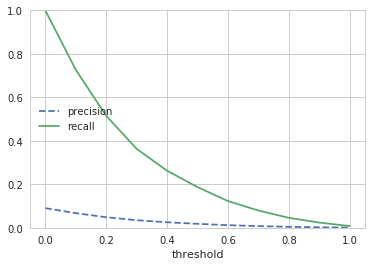

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_forest)
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)

In [47]:
y_probas_forest

array([[ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 1. ,  0. ],
       [ 0.9,  0.1],
       [ 1. ,  0. ]])

In [48]:
y_scores_forest

array([ 1. ,  1. ,  1. , ...,  1. ,  0.9,  1. ])

In [49]:
average_precision_score(y_train_5, y_scores_forest,average='weighted')

0.053861384432353068

y_scores_forest > YOUR_THRESHOLD

In [50]:
y_tmp = y_scores_forest > 0.5

In [51]:
print(precision_score(y_train_5, y_tmp))
print(recall_score(y_train_5, y_tmp))

0.0121081198831
0.123040029515


In [52]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [53]:
y_pred = sgd_clf.predict(X_test)

In [54]:
confusion_matrix(y_test, y_pred)

array([[ 942,    0,    0,    2,    2,   17,    1,    4,   11,    1],
       [   0, 1098,    4,    0,    1,   11,    3,    2,   16,    0],
       [   3,    3,  856,   26,   27,   17,    6,   16,   77,    1],
       [   3,    0,   15,  807,    6,  121,    1,   15,   37,    5],
       [   0,    1,    2,    1,  950,    1,    3,    4,   10,   10],
       [   5,    2,    1,   15,   21,  809,    3,    9,   24,    3],
       [  13,    3,    8,    2,   48,   85,  784,    2,   13,    0],
       [   0,    4,   11,    4,   14,    4,    0,  955,   12,   24],
       [   3,    6,    6,   20,   21,   95,    0,   16,  798,    9],
       [   5,    3,    1,    6,  122,   52,    0,  108,   22,  690]])

In [55]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [56]:
some_digit_scores

array([[-130503.42519238, -413131.15512748, -522739.6913637 ,
        -143483.72680141, -310580.09183437,  122685.73434732,
        -802204.69941165, -346103.19691783, -699532.91482089,
        -723625.83567467]])

In [57]:
np.argmax(some_digit_scores)

5

In [58]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [59]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [60]:
len(ovo_clf.estimators_)

45

## 클래스 = 1 2 3 4 .. 9
## (1,2) (1,3) ... (8,9) OvO했을 때 구하는 추정기(분류선) 갯수 = 45

In [61]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [62]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0.1,  0.2,  0. ,  0.6,  0. ,  0. ,  0. ,  0. ]])

In [63]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.86372725,  0.87929396,  0.82672401])

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_trained_scaled, y_train, cv=3, scoring='accuracy')

array([ 0.90886823,  0.90919546,  0.90993649])

In [65]:
y_train_pred = cross_val_predict(sgd_clf, X_trained_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5731,    2,   17,    9,   11,   50,   49,   10,   40,    4],
       [   1, 6473,   42,   25,    5,   48,    5,   10,  121,   12],
       [  51,   38, 5305,   98,   82,   29,  102,   64,  175,   14],
       [  49,   37,  133, 5328,    2,  256,   37,   62,  132,   95],
       [  19,   25,   37,    7, 5363,    8,   50,   32,   84,  217],
       [  65,   34,   32,  176,   71, 4634,  108,   28,  174,   99],
       [  34,   25,   35,    2,   43,  103, 5623,    6,   47,    0],
       [  24,   23,   64,   28,   56,   12,    6, 5780,   15,  257],
       [  52,  145,   68,  149,   14,  155,   56,   29, 5055,  128],
       [  43,   30,   27,   89,  170,   34,    2,  209,   77, 5268]])

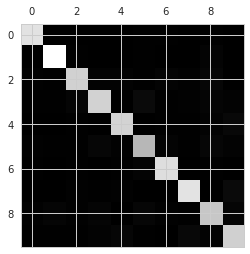

In [66]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [67]:
row_nums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_nums

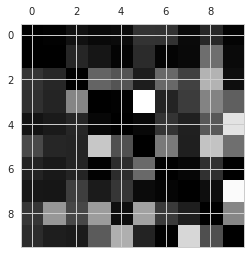

In [68]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [69]:
y_train_pred = cross_val_predict(forest_clf, X_trained_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5814,    3,   12,    8,    8,    9,   28,    4,   33,    4],
       [   0, 6625,   41,   25,   10,   10,    1,   16,   10,    4],
       [  36,   20, 5644,   51,   34,   18,   34,   56,   50,   15],
       [  22,   16,  140, 5625,    6,  126,   14,   54,   89,   39],
       [  17,   22,   36,    9, 5566,    6,   32,   15,   18,  121],
       [  49,   15,   25,  214,   29, 4946,   42,    6,   59,   36],
       [  59,   17,   33,    7,   36,   52, 5694,    0,   20,    0],
       [  17,   35,   83,   17,   63,    5,    0, 5923,   17,  105],
       [  39,   60,   74,  137,   52,   95,   50,   14, 5256,   74],
       [  32,   18,   24,   93,  173,   38,    8,   90,   54, 5419]])

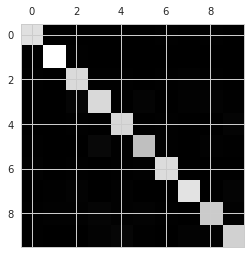

In [70]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [71]:
row_nums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_nums

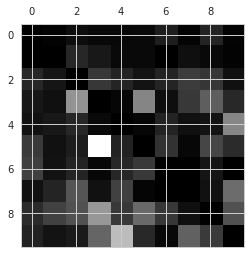

In [72]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

In [74]:
y_multilabel

array([[ True, False],
       [ True,  True],
       [ True,  True],
       ..., 
       [False,  True],
       [False, False],
       [False,  True]], dtype=bool)

In [75]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [79]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel,cv=3,n_jobs=-1)

Process ForkPoolWorker-23:
Process ForkPoolWorker-21:
Process ForkPoolWorker-20:
Process ForkPoolWorker-22:
Process ForkPoolWorker-24:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ej/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ej/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ej/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ej/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ej/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ej/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/ej/anaconda3/lib

KeyboardInterrupt: 

In [ ]:
classification_report(y_multilabel, y_train_knn_pred)